In [1]:
from binarySegmentation import binarySegmentation

import numpy as np

import pandas as pd

from sklearn import linear_model

from sklearn import ensemble

import matplotlib.pyplot as plt

import seaborn as sns

from joblib import dump

from joblib import load

sns.set_style('darkgrid')
sns.set_context("notebook")

In [2]:
experiments = [['experiments' + regressor + covarianceMatrix + segmentsQuantity, regressor.upper(), covarianceMatrix.upper(), int(segmentsQuantity[0])] 
               for regressor in ['LASSO', 'RFR']
               for covarianceMatrix in ['diagonal', 'equicorrelation', 'toeplitz']
               for segmentsQuantity in ['2seg', '3seg']
              ]

In [3]:
data = []
for experiment in experiments:
    experimentData = load(experiment[0])
    data += [ experiment +
             [  experimentData[j][0]                                         # Dimension
              , experimentData[j][1][i][0]                                   # Quantity of segments
              , experimentData[j][1][i][1]/experimentData[j][0]              # Mean Squared Error
              , None if experimentData[j][1][i][2] is None
                else 2*experimentData[j][1][i][2][1][0]/experimentData[j][0] # First split
              , None if experimentData[j][1][i][2] is None or len(experimentData[j][1][i][2]) <= 2
                else 2*experimentData[j][1][i][2][2][0]/experimentData[j][0] # Second split
              , None if experimentData[j][1][i][2] is None or len(experimentData[j][1][i][2]) <= 3
                else 2*experimentData[j][1][i][2][3][0]/experimentData[j][0] # Third split
              , None if experimentData[j][1][i][2] is None or len(experimentData[j][1][i][2]) <= 4
                else 2*experimentData[j][1][i][2][4][0]/experimentData[j][0] # Fourth split
             ] for j in range(len(experimentData))
               for i in range(len(experimentData[j][1]))  
            ]

data = pd.DataFrame(data, columns=['file','regression function', 'covariance matrix', 'segments quantity', 'dimension', 'estimated segments quantity', 'mean squared error', 'first split', 'second split', 'third split', 'fourth split'])

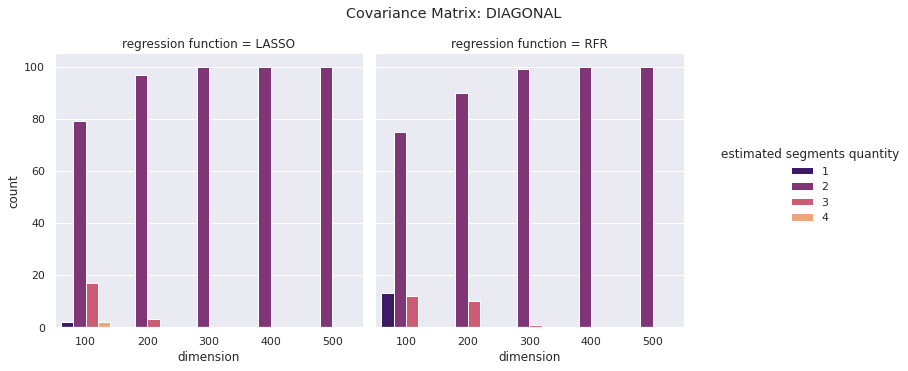

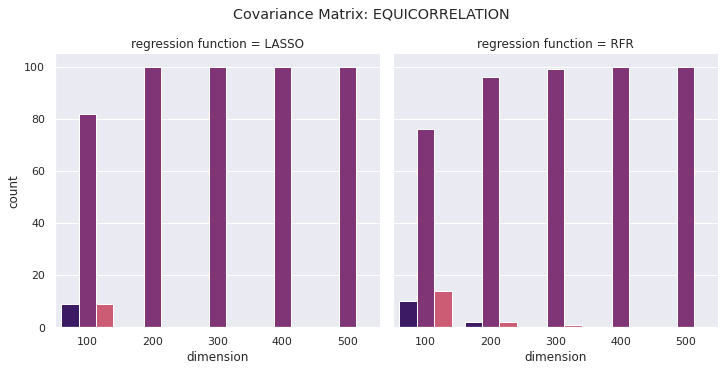

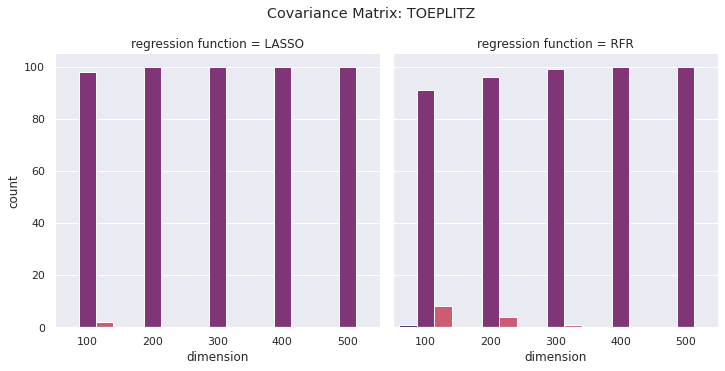

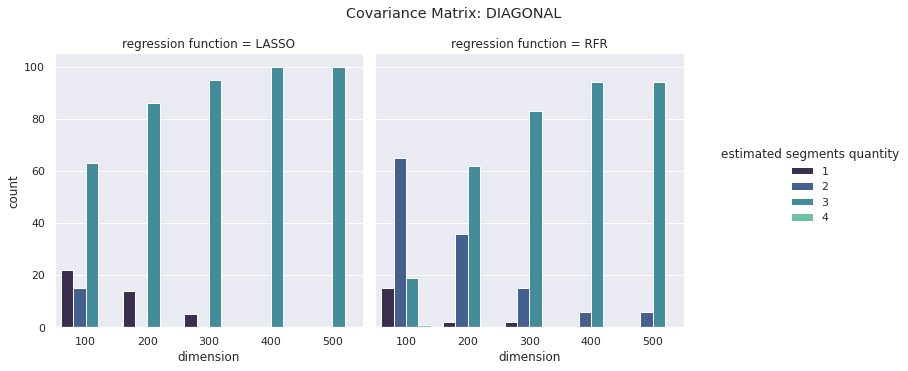

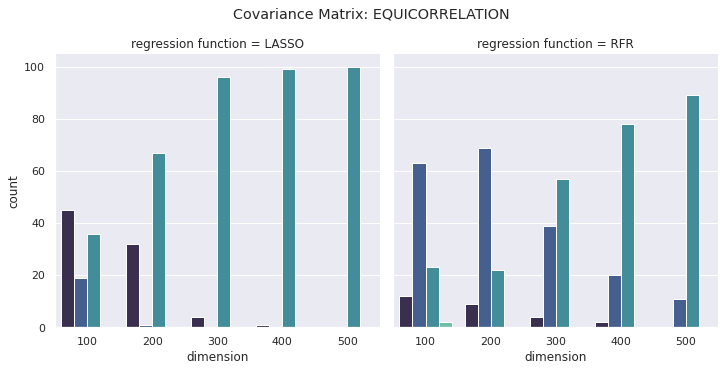

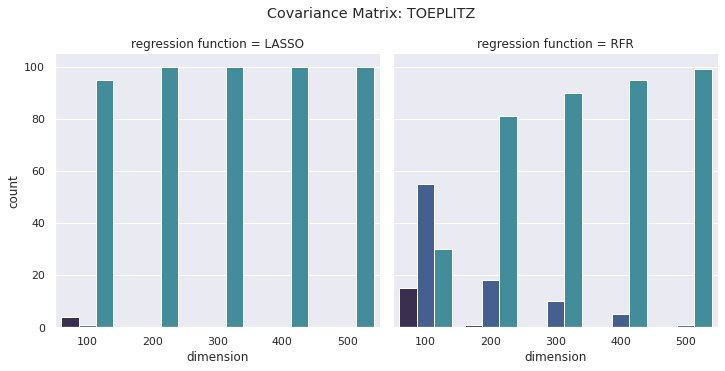

In [4]:
for segmentsQuantity in data['segments quantity'].unique():
    for covarianceMatrix in data['covariance matrix'].unique():
        if segmentsQuantity == 2:
            pallete = sns.color_palette(**{'palette':'magma', 'n_colors':4})
        if segmentsQuantity == 3:
            pallete = sns.color_palette(**{'palette':'mako', 'n_colors':4})
        g = sns.catplot(  data=data[  (data['segments quantity'] == segmentsQuantity)
                                & (data['covariance matrix'] == covarianceMatrix)
                               ]
                    , x = 'dimension'
                    , hue = 'estimated segments quantity'
                    , col = 'regression function'
                    , kind = 'count'
                    , palette=pallete
                    , legend = covarianceMatrix == 'DIAGONAL'
                    , legend_out = True
                    , margin_titles = True
                   )
        g.fig.subplots_adjust(top=0.85)
        g.fig.suptitle('Covariance Matrix: ' + covarianceMatrix)

In [5]:
dataSplits = pd.melt(  data
                     , id_vars=[  'regression function'
                                , 'covariance matrix'
                                , 'segments quantity'
                                , 'dimension'
                                , 'estimated segments quantity'
                               ]
                     , value_vars=[  'first split'
                                   , 'second split'
                                   , 'third split'
                                   , 'fourth split'
                                  ]
                     , value_name='split'
                    ).dropna()

In [6]:
segmentsQuantity = 2
covarianceMatrix = 'diagonal'.upper()

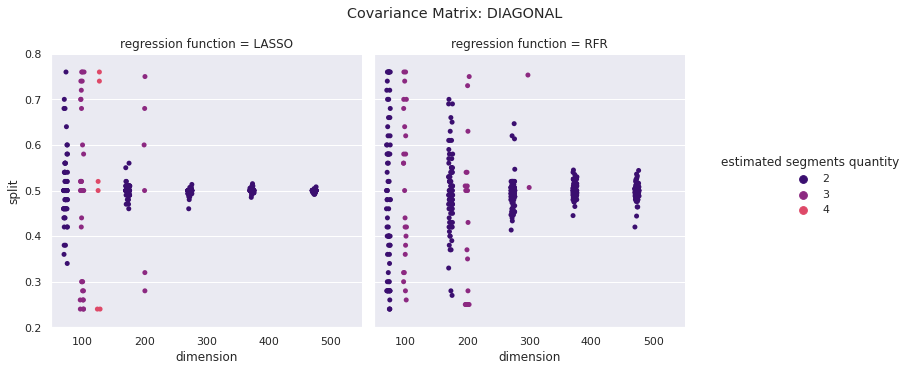

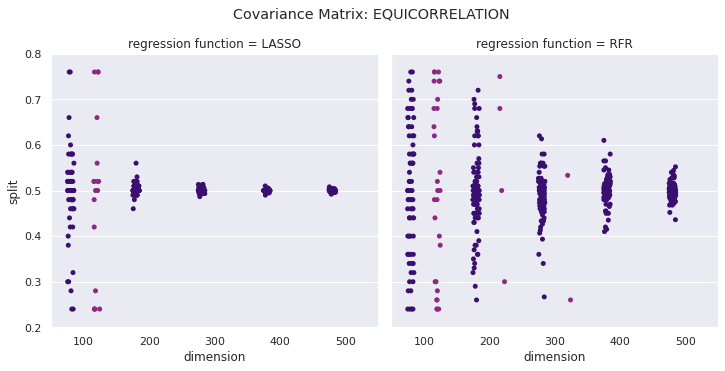

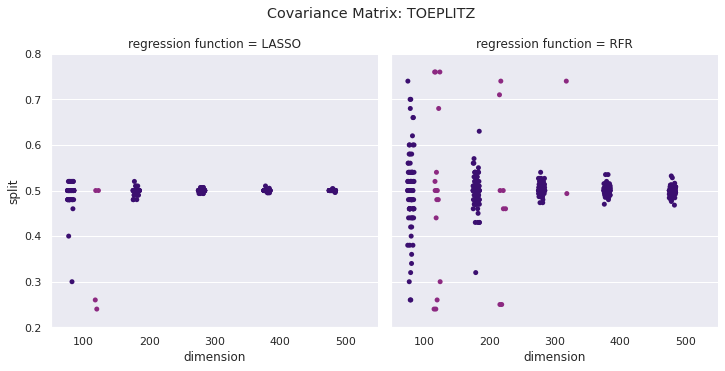

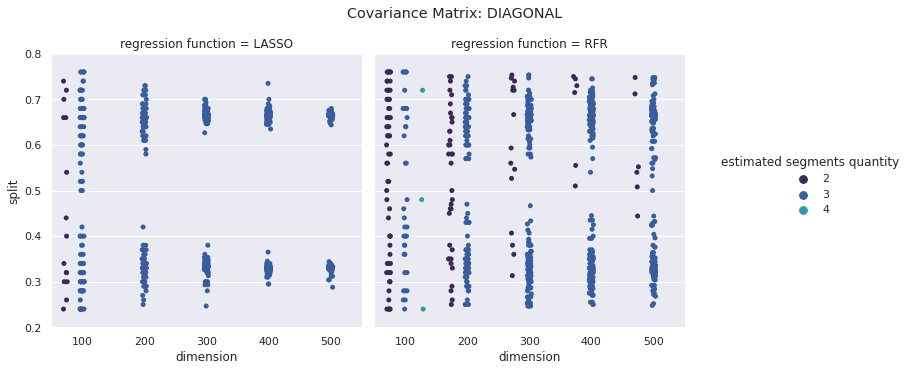

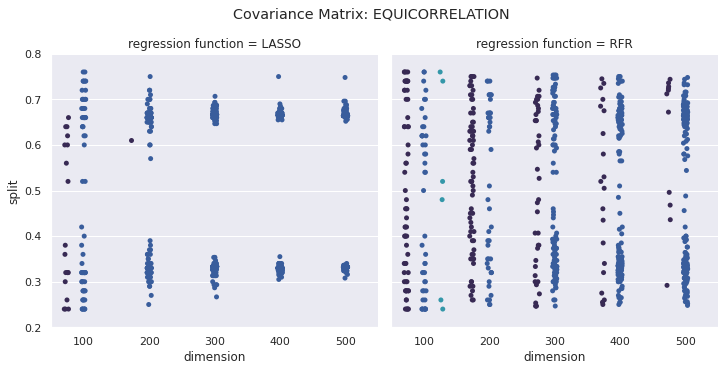

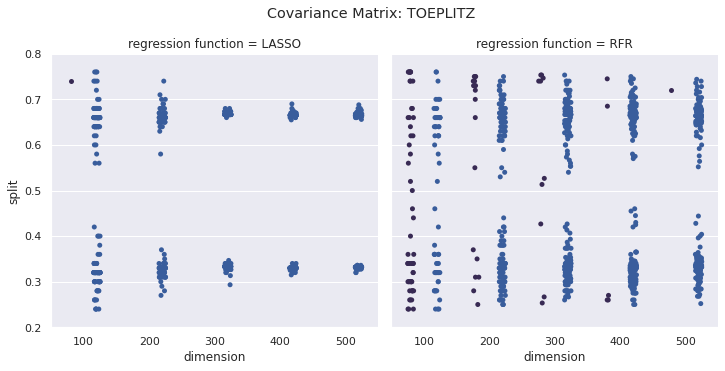

In [7]:
for segmentsQuantity in dataSplits['segments quantity'].unique():
    for covarianceMatrix in dataSplits['covariance matrix'].unique():
        if segmentsQuantity == 2:
            pallete = sns.color_palette(**{'palette':'magma', 'n_colors':4})
        if segmentsQuantity == 3:
            pallete = sns.color_palette(**{'palette':'mako', 'n_colors':4})
        g=sns.catplot(  data=dataSplits[  (dataSplits['segments quantity'] == segmentsQuantity)
                                      & (dataSplits['covariance matrix'] == covarianceMatrix)
                                     ]
                    , x = 'dimension'
                    , y = 'split'
                    , hue = 'estimated segments quantity'
                    , col = 'regression function'
                    , palette=pallete
                    , legend = covarianceMatrix == 'DIAGONAL'
                    , legend_out = True
                    , margin_titles = True
                    , dodge = True
                    , jitter = True
                   )
        g.set(ylim=(0.2,0.8))
        g.fig.subplots_adjust(top=0.85)
        g.fig.suptitle('Covariance Matrix: ' + covarianceMatrix)

In [8]:
data

,file,regression function,covariance matrix,segments quantity,dimension,estimated segments quantity,mean squared error,first split,second split,third split,fourth split
0,experimentsLASSOdiagonal2seg,LASSO,DIAGONAL,2,100,2,0.636516,0.560,NaN,NaN,None
1,experimentsLASSOdiagonal2seg,LASSO,DIAGONAL,2,100,3,0.619905,0.240,0.720,NaN,None
2,experimentsLASSOdiagonal2seg,LASSO,DIAGONAL,2,100,2,0.570607,0.500,NaN,NaN,None
3,experimentsLASSOdiagonal2seg,LASSO,DIAGONAL,2,100,2,0.733100,0.500,NaN,NaN,None
4,experimentsLASSOdiagonal2seg,LASSO,DIAGONAL,2,100,2,0.604722,0.680,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...
5995,experimentsRFRtoeplitz3seg,RFR,TOEPLITZ,3,500,3,0.243308,0.332,0.644,NaN,None
5996,experimentsRFRtoeplitz3seg,RFR,TOEPLITZ,3,500,3,0.253147,0.332,0.640,NaN,None
5997,experimentsRFRtoeplitz3seg,RFR,TOEPLITZ,3,500,3,0.211557,0.336,0.664,NaN,None
5998,experimentsRFRtoeplitz3seg,RFR,TOEPLITZ,3,500,2,0.423286,0.720,NaN,NaN,None


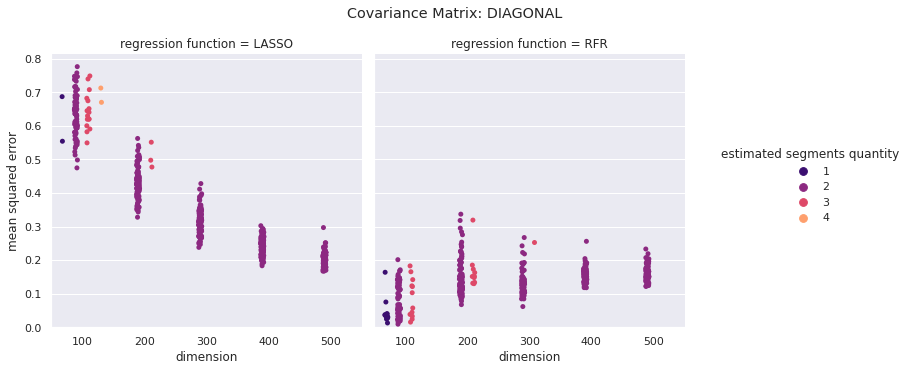

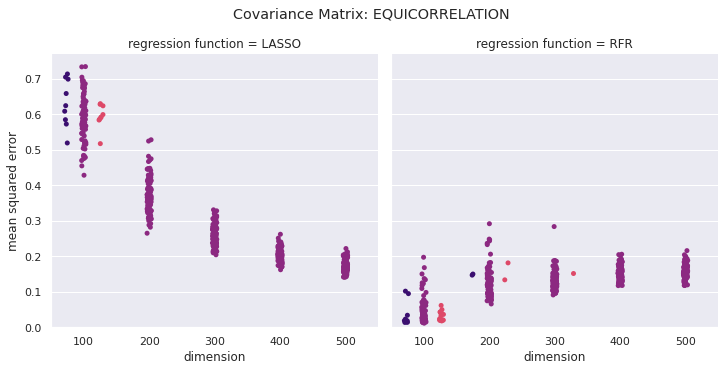

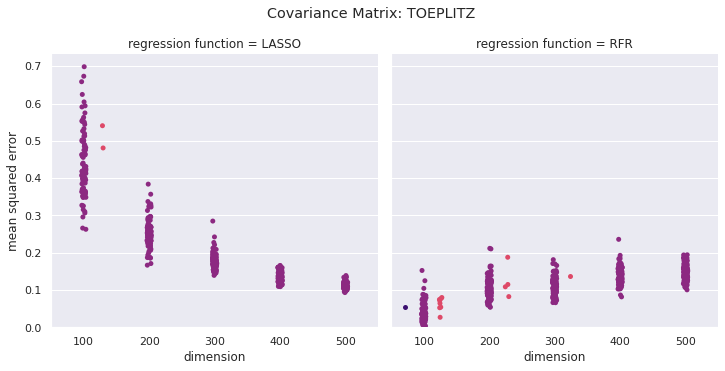

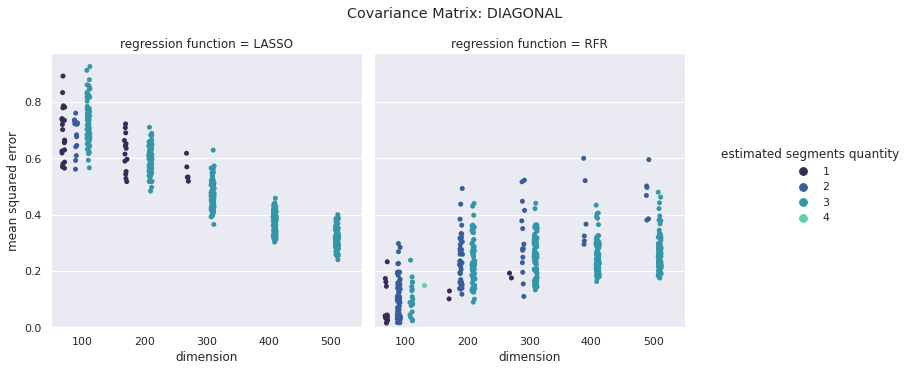

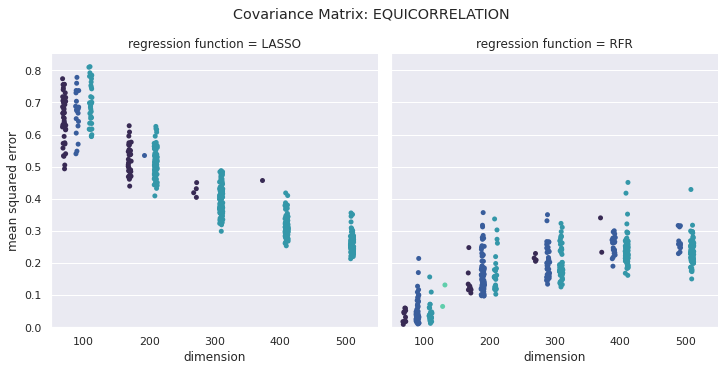

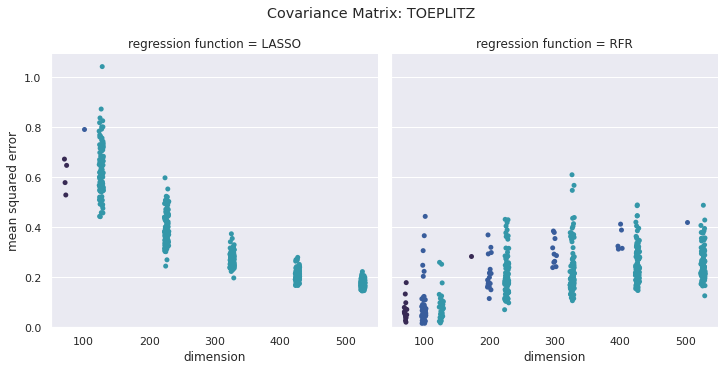

In [9]:
for segmentsQuantity in data['segments quantity'].unique():
    for covarianceMatrix in data['covariance matrix'].unique():
        if segmentsQuantity == 2:
            pallete = sns.color_palette(**{'palette':'magma', 'n_colors':4})
        if segmentsQuantity == 3:
            pallete = sns.color_palette(**{'palette':'mako', 'n_colors':4})
        g=sns.catplot(  data=data[  (data['segments quantity'] == segmentsQuantity)
                                      & (data['covariance matrix'] == covarianceMatrix)
                                     ]
                    , x = 'dimension'
                    , y = 'mean squared error'
                    , hue = 'estimated segments quantity'
                    , col = 'regression function'
                    , palette=pallete
                    , legend = covarianceMatrix == 'DIAGONAL'
                    , legend_out = True
                    , margin_titles = True
                    , dodge = True
                    , jitter = True
                   )
        g.set(ylim=(0,None))
        g.fig.subplots_adjust(top=0.85)
        g.fig.suptitle('Covariance Matrix: ' + covarianceMatrix)